

The purpose of this study-generate a confidence calibration model over the iris dataset. This model is used to predict the reliability of a classifier's predicted probabilities. It is achieved by comparing the predicted probabilities to the actual outcomes in a set of labeled data. The confidence calibration model will then use this information to adjust the predicted probabilities, so they better reflect the true probabilities of the classifier's outputs.The model also has an  output apart from the main output, which is calculated using a custom Dirichlet loss layer, defined in the custom DirichletLoss class. This layer takes three inputs: the predicted probabilities, the ground truth, and the sample weights, and calculates the loss and two metrics (confidence loss and confidence score). The confidence score is the mean of the reciprocal of the variance of a DirichletMultinomial distribution.After training, the code makes predictions and creates a pandas dataframe with inputs, true labels, predictions, and confidence values. It also prints the mean confidence value for the training and validation data.






In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt


# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras

Instructions for updating:
non-resource variables are not supported in the long term


##Importing necessary libraries

In [ ]:
from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from joblib import dump, load

##Loading Iris Dataset and Splitting it into training and testing


In [ ]:
from sklearn.datasets import load_iris
# Load iris dataset

iris = load_iris()
X = iris.data
y = iris.target
cols = ['sepal_length', ' sepal_width', 'petal_length', 'petal_width', 'species']

# One hot encoding
y = tf.keras.utils.to_categorical(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=40)

print(iris.data)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

This code uses the scikit-learn library to load the Iris dataset, which is
a commonly used dataset for machine learning classification problems. The Iris dataset consists of 150 samples of iris flowers, with four features (sepal length, sepal width, petal length, and petal width) and one target variable (the species of the iris flower).

The code assigns the feature data to the variable "X" and the target data to the variable "y". Then, the code uses the 'to_categorical' function from the TensorFlow library to perform one-hot encoding on the target variable, which converts the target variable from a numerical format to a binary format, where each category is represented by a binary vector with a 1 in the position corresponding to the category and 0's everywhere else. This is often useful in machine learning problems when the target variable is categorical.

Finally, the code splits the data into training and testing sets using the 'train_test_split' function from scikit-learn library. The function takes in the feature and target data, along with the test size (30% in this case) and a random state (40 in this case) as inputs. This splits the data into 70% for training and 30% for testing.

##Model architecture


In [ ]:
#Functional API model
# Step 1- Importing global variables
from tensorflow.keras import layers
from keras import backend as K
from keras.layers import Dense, Input, Lambda
from keras.models import load_model, Model
from keras.layers.core import Lambda
import numpy as np

 #Step 2: Input layer
input = keras.layers.Input(shape=X_train.shape[1:])
# Step 3: Hidden layers
h = keras.layers.Dense(1000, activation='relu')(input)
##Creating the second layer
h = keras.layers.Dense(500, activation='relu')(h)
#Layer after the intermediary feature layer
topmost_feature_layer = keras.layers.Dense(300, activation='relu')(h)
#Dropout layer
h = keras.layers.Dropout(0.2)(topmost_feature_layer)
###This code block defines the hidden layers in the model. There are two dense layers with 1000 and 500 units respectively,
##followed by a dropout layer with a rate of 0.2.
## The relu activation function is used for all three dense layers.

#Step 3- Main output layer
main_output_dense_layer = keras.layers.Dense(3, activation='softmax', name="main_output")
main_output = main_output_dense_layer(h)

# Main output layer without dropout

main_output_without_dropout = main_output_dense_layer(topmost_feature_layer)

#Step 4: Dirichlet Loss Layer
#Defining custom Dirichlet loss layer
class DirichletLoss(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(DirichletLoss, self).__init__(**kwargs)

#The custom layer takes three inputs: the predicted values predictions, the ground truth values ground_truth, and the sample weights sample_weight
    def call(self, concentrations, predictions, ground_truth, sample_weight=None):
        p = K.stop_gradient(tf.maximum(predictions, 1e-8))
        p = p / tf.reduce_sum(p, axis=1, keepdims=True)
        prior = tf.distributions.DirichletMultinomial(1.0, concentrations)
        self.add_loss(-tf.reduce_mean(prior.log_prob(p) + prior.log_prob(ground_truth)))
        self.add_metric(-prior.log_prob(p) - prior.log_prob(ground_truth), aggregation='mean',name='conf_loss')

#Step 5: Generating confidence score and adding it as a metric to the model
        #Confidence score, defined as the mean of the reciprocal of the variance of the DirichletMultinomial distribution
        confidence = tf.reduce_mean(tf.math.log(1 + tf.math.reciprocal(prior.variance())), axis=1)
        self.add_metric(confidence, name='confidence_metrics', aggregation='mean')
        return confidence

#Feature stopped gradient
ref_input = keras.layers.Input(shape=y_train.shape[1:])
feature_stopped_gradient = tf.keras.layers.Lambda(lambda x: K.stop_gradient(x))(topmost_feature_layer)
h_confidence = tf.keras.layers.Dense(3, activation='relu')(feature_stopped_gradient)
#Concentrations output
concentrations_output = tf.keras.layers.Dense(3, activation='exponential')(h_confidence)
#The confidence is calculated from the Dirichlet loss and returned by the custom layer.
confidences = DirichletLoss(name="concentrations_output")(concentrations_output, main_output_without_dropout, ref_input)

# Step 6: Defining model
model = keras.Model(inputs=[input, ref_input], outputs=[main_output, confidences], name="iris")
#Step 7:Compiling the model.
model.compile(optimizer="Adam",
              loss={'main_output': 'categorical_crossentropy'},
              metrics={'main_output': 'accuracy'})

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.



Here, Keras (with TensorFlow as the backend) **functional API** is used to build a neural network model. The model consists of multiple dense layers, dropout layer, custom loss layer, and input layers. The code uses various concepts such as forward and backward pass, gradient descent, activation functions, and regularization techniques. More information on Keras Functional API model can be found on https://keras.io/guides/functional_api/

A neural layer can be represented mathematically as a linear transformation of the input data followed by a non-linear activation function:

**y = f(Wx + b)**

Where:

W is the weight matrix,
x is the input data,
b is the bias vector,
f is the activation function.

**Input layer:** The input layer specifies the shape of the input data. The shape of the input data is given by the X_train data.

**Dense layer**:  The activation function used here is the Rectified Linear Unit (ReLU) function.The model has several dense (fully connected) layers with the ReLU activation function, with the first two layers having 1000 and 500 neurons, respectively, and the final intermediary feature layer having 300 neurons.

**Dropout layer**: The dropout layer is used to prevent overfitting. The dropout layer randomly sets a specified fraction of the inputs to zero during training.

**Main output layer**: Main_output is the output tensor with shape (number of samples, 3) and activation function is Softmax.This layer outputs the predicted class probabilities for each of the 3 classes.

**Main output layer without dropout**: The same dense layer for main output is used, but applied to the topmost feature layer (before dropout) to get the main output without dropout.

##Custom Dirichlet Loss Layer
The custom Dirichlet loss layer is defined using the class DirichletLoss derived from tf.keras.layers.Layer.DirichletLoss calculates the Dirichlet loss, which is a measure of the difference between the predicted class probabilities and the ground truth labels. The loss is calculated as the negative log probability of the predictions and ground truth under a Dirichlet distribution.

The dirichlet distribution can be defined as:
$p(x|α) = \frac{\prod_{i=1}^k x_i^{\alpha_i-1}}{\Gamma(\sum\alpha)}$ for $0 < x_i < 1$ and $\sum_{i=1}^k x_i = 1$

where α is a vector of positive real numbers representing the concentration parameters, k is the number of dimensions, x is a vector of probabilities, Γ is the gamma function, and ^(-1) represents the reciprocal.


1. The custom Dirichlet loss layer is defined by subclassing the tf.keras. layers.Layer class and overriding the call method. The custom layer takes three inputs: the predicted values, the ground truth values, and the sample weights.
2. The custom layer first computes the probability distribution p from the predicted values by ensuring that no value is less than a small positive number 1e-8, normalizing the values and computing their softmax, the custom layer creates a DirichletMultinomial distribution with a fixed concentration value of 1.0 and the  **concentrations** passed in as input.

3. The custom layer adds the negative mean of the log probabilities of the predicted and ground truth distributions as the loss. The custom layer also adds the confidence score, defined as the mean of the reciprocal of the variance of the DirichletMultinomial distribution, as a metric.Mathematically, the Dirichlet loss can be represented as:
$Loss(p, q) = KL(p || q) = \sum_{i=1}^k (p_i \log\frac{p_i}{q_i} + (1-p_i) \log\frac{1-p_i}{1-q_i})$

where, p is the true probability distribution and q is the predicted probability distribution. The KL divergence, also known as the Kullback-Leibler divergence, measures the difference between two probability distributions.

##Confidence score calculation

The confidence score is calculated using the feature stopped gradient from the intermediary feature layer and a dense layer with 3 units and a ReLU activation. The output of the dense layer is transformed using the exponential activation to get the concentrations, which is used as the input to the custom Dirichlet loss layer. The custom layer calculates the confidence score from the Dirichlet loss and returns it.

The **confidence score** is given by:

**confidence = mean(log(1 + (1 / variance)), over all samples**

where variance is the variance of the DirichletMultinomial distribution.

##Model compilation

Finally, the entire model is constructed using the Model class, where the inputs are input and ref_input, and the outputs are main_output and confidence. The model is compiled using the Adam optimizer and the categorical cross-entropy loss function. The accuracy metric is also calculated for the main_output.




















        

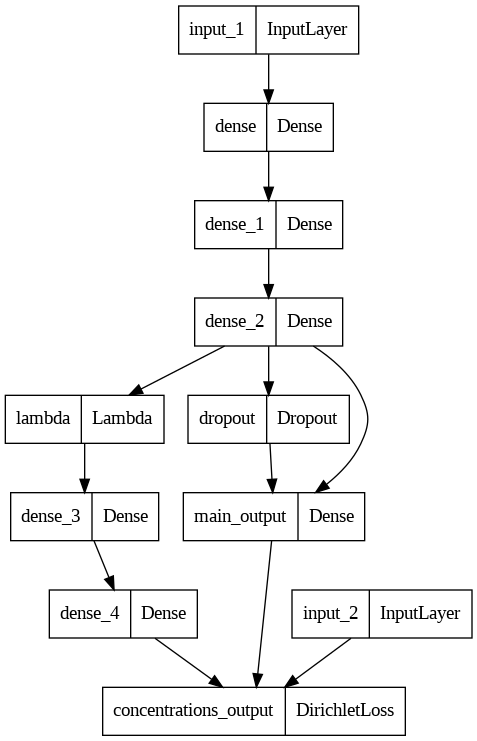

In [ ]:
#Plotting model
tf.keras.utils.plot_model(model)

##Model training

In [ ]:
#Step8:Model training

history = model.fit([X_train, y_train], y_train, epochs=30, validation_data=([X_test, y_test], y_test), verbose=1)

Train on 105 samples, validate on 45 samples
Epoch 1/30
 96/105 [==========================>...] - ETA: 0s - loss: 3.1746 - main_output_loss: 1.0341 - main_output_acc: 0.4167 - conf_loss: 2.1405 - confidence_metrics: 1.7104

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


105/105 [==============================] - 1s 12ms/sample - loss: 3.1434 - main_output_loss: 0.9525 - main_output_acc: 0.4667 - conf_loss: 2.1373 - confidence_metrics: 1.7108 - val_loss: 3.0928 - val_main_output_loss: 0.9305 - val_main_output_acc: 0.6667 - val_conf_loss: 2.1482 - val_confidence_metrics: 1.7308
Epoch 2/30
105/105 [==============================] - 0s 2ms/sample - loss: 2.9224 - main_output_loss: 0.7415 - main_output_acc: 0.6667 - conf_loss: 2.1177 - confidence_metrics: 1.7240 - val_loss: 2.5410 - val_main_output_loss: 0.5179 - val_main_output_acc: 0.6889 - val_conf_loss: 2.0122 - val_confidence_metrics: 1.7158
Epoch 3/30
105/105 [==============================] - 0s 2ms/sample - loss: 2.5397 - main_output_loss: 0.5410 - main_output_acc: 0.6667 - conf_loss: 1.9709 - confidence_metrics: 1.7163 - val_loss: 2.2585 - val_main_output_loss: 0.4133 - val_main_output_acc: 0.9778 - val_conf_loss: 1.8639 - val_confidence_metrics: 1.7244
Epoch 4/30
105/105 [========================


The history variable in this code is a result of training a Keras model using the fit function.

The fit function trains a model using input training data X_train and target training data y_train. The number of training epochs is specified as 30.The network is trained for 30 epochs, and its performance is evaluated on validation data [X_test, y_test] with target y_test.

##Model evaluation

The model is evaluated using validation data X_test and y_test after each epoch, and the results are stored in history.Mathematically, the model is trying to learn the relationship between the input training data X_train and target training data y_train. At each epoch, the model updates its weights based on the loss calculated between the predicted target y_pred and the actual target y_train. The loss is calculated using the categorical cross-entropy loss function, which measures the dissimilarity between the predicted probability distribution and the true distribution. The optimization algorithm used is Adam, which is a gradient-based optimization method that adapts the learning rate during training. The goal of the optimization is to minimize the loss function and ultimately improve the model's accuracy on the validation data.






## Graphs

##Plotting the loss for the main_output in training and validation

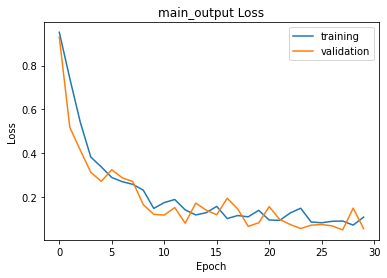

In [ ]:
# Plot the loss for the main_output in training and validation
plt.plot(history.history['main_output_loss'])
plt.plot(history.history['val_main_output_loss'])
plt.title('main_output Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()


This code plots the history of main_output loss during training. The plot shows two curves, one for the main_output loss on the training set  and one for the main_output loss on the validation set.

Overfitting occurs when the model performs well on the training data but poorly on unseen data, meaning the model has memorized the training data rather than learned from it. The lower validation loss  suggests that the model is generalizing well and can handle new data.

##Plotting the accuracy for the main_output

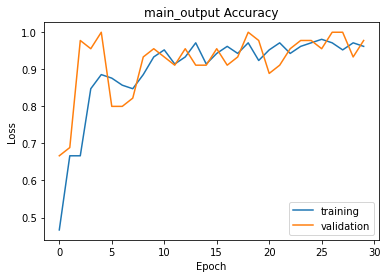

In [ ]:
# Plot the accuracy for the main_output
plt.plot(history.history['main_output_acc'])
plt.plot(history.history['val_main_output_acc'])
plt.title('main_output Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['training','validation'], loc='lower right')
plt.show()


There is a general expectation is that the accuracy on the validation set is similar to the accuracy on the training set, or slightly lower. If the accuracy on the validation set is significantly higher than the accuracy on the training set, this can indicate overfitting, where the model is too closely fit to the training data and is not generalizing well to new, unseen data.

Conversely, if the accuracy on the validation set is significantly lower than the accuracy on the training set, this can indicate underfitting, where the model is not complex enough to capture the patterns in the data. Here in this case the accuracy of the validation set after training for a few epochs is slighly lower, slighly higher or similar to the training accuracy.






##Plotting the Confidence loss in training

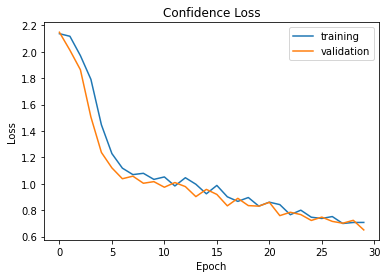

In [ ]:
# Plot the Confidence loss in training
plt.plot(history.history['conf_loss'])
plt.plot(history.history['val_conf_loss'])
plt.title('Confidence Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['training','validation'], loc='upper right')
plt.show()


1. Confidence loss is the negative log likelihood of the prediction and ground truth given the Dirichlet distribution, which is added to the layer's metric collection using the add_metric method with aggregation set to mean.
2. The plot produced shows how the confidence loss changed during the training process for both training and validation sets.If the confidence loss is decreasing over the epochs, it indicates that the model is learning and improving its predictions on the target variable. This is usually a good sign, and suggests that the model is making progress in fitting to the data and making accurate predictions. It's common to see fluctuations in the training loss, but if the loss continues to decrease over time, it's likely that the model is learning from the training data and improving its predictions.

3. If the validation loss also decreases over time, this suggests that the model is generalizing well and not overfitting to the training data. However, if the validation loss increases or fluctuates, this may indicate overfitting or that the model is not generalizing well to new, unseen data.

##Plotting the Confidence values in training and validation

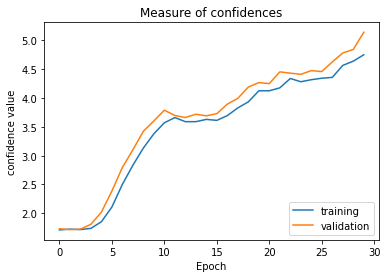

In [ ]:
# Plot the Confidence in training and validation
plt.plot(history.history['confidence_metrics'])
plt.plot(history.history['val_confidence_metrics'])
plt.title('Measure of confidences')
plt.xlabel('Epoch')
plt.ylabel('confidence value')
plt.legend(['training','validation'], loc='lower right')
plt.show()


The confidence value is the mean of the reciprocal of the variance of the Dirichlet distribution.The confidence value could be used for other purposes such as evaluation or interpretation of the model's output.
The confidence value is a measure of how confident the model is in its predictions.

The confidence values for both training and validation sets are consistently rising over the course of the epochs, it suggests that the model is becoming more confident in its predictions. This may indicate that the model is learning from the training data and improving its ability to make accurate predictions



####Model prediction

In [ ]:
from keras.utils.np_utils import to_categorical
#Step 9: Computing predictions
y_pred, y_conf  = model.predict([X_train, y_train])
#Step 10: Creating a pandas dataframe with inputs,true lables, predictions and confidence values
df = pd.DataFrame(data=[list(a) for a in [X_train, np.argmax(y_train, axis = 1), np.argmax(y_pred, axis = 1), y_conf]]).T

# Step 11: Printing the mean confidence value
print(f"Confidence training: {np.mean(df[3])}")
print(f"Confidence HITS: {np.mean(np.mean(df[df[1]==df[2]][3]))}")
print(f"Confidence MISSES: {np.mean(np.mean(df[df[1]!=df[2]][3]))}")

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Confidence training: 4.986435081845238
Confidence HITS: 5.12283356021149
Confidence MISSES: 2.7358506520589194



The confidence statistics on the training set is computed. It starts by computing the prediction "y_pred" and confidence "y_conf" on the training data "X_train" and true labels "y_train".

Then, it creates a pandas dataframe "df" with the inputs, true labels, predictions, and confidence values.

Finally, the code computes and prints the mean confidence value of the entire training set, mean confidence value of correctly classified samples, and mean confidence value of misclassified samples.
print statements are displaying the mean confidence values of the model's predictions on the training set and validation set.

The first print statement "Confidence training 4.986435081845238" shows the average confidence of the model's predictions on the training set.
The next two print statements show the mean confidence values of the model's predictions where it was correct (HITS) and where it was incorrect (MISSES) on the training set. "Confidence HITS: 5.12283356021149" means the average confidence of the model's correct predictions on the training set.

Confidence value is a measure of how certain the model is of its predictions, with higher values indicating higher confidence. It is observed that Confidence HITS has mean value than Confidence MISSES, which is the expected behavior.





In [ ]:
# Step 12: Predicting on validation set
_, y_conf_validation  = model.predict([X_test, y_test])
print(f"Confidence validation: {np.mean(y_conf_validation)}")

Confidence validation: 5.142912864685059


##Model validation
The model.predict function is called with the validation data X_test and the ground truth y_test as inputs. The returned value _, y_conf_validation contains the prediction probabilities for each class and the confidence. There is a difference of 0.16 points in the confidence values of training and validation sets. The difference is so  low, so it may be concluded that the model is not prone to overfitting and is generalising well to the unseen data.


##Conclusion
The model consists of multiple hidden layers with ReLU activations, a main output layer with a softmax activation, a custom Dirichlet loss layer, and a confidence score calculated from the Dirichlet loss. The objective was to obtain confidence score of the models predictions which was computed from the variance of the Dirichlet distribution. The main output loss for the validation set was lower , so it means that the model is performing well on the unseen data and is generalising well. The main output accuracy for the training and validation set is following the expected behaviour, where the two accuracies have to be more or less similar while training through epochs. The confidence loss is decreasing over time, it means that the mean is learning and improving its predictions. The confidence score for both training and validation sets is rising after 10 epochs, so it means that the model is becoming more and more confident in improving its predictions. Also, it is observed that the mean confidence of predictions correctly idenfified by the model is higher than the mean confidence of predictions wrongly identified by the mode, which is the expected behaviour of the model. Also, the mean confidence values generated by training and validation sets are similar and only differ by 0.16 mean points. So, it means that the model is not overfitting.

**References**

https://keras.io/guides/functional_api/
https://keras.io/api/layers/base_layer/#addmetric-method
https://en.wikipedia.org/wiki/Dirichlet_distribution#Moments
https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/DirichletMultinomial#entropy
https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/Distribution#variance
